In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.svm import SVR
from sklearn.preprocessing import normalize
from datetime import datetime
from sklearn.model_selection import cross_val_score

In [54]:
%run GasLearningHelper.py 
%run ElasticSearchHelper.py
%run commonHelper.py
gasHelper = GasLearningHelper()
esHelper = ElasticSearchHelper()
cHelper = CommonHelper()

In [10]:
gasData = gasHelper.ReadGasData('C:/Users/star/Documents/Domo/2018-01-06-ecas-export.db', '2017-12-01')
gasDataDelta = gasHelper.CreateDelta(gasData)
rangeQueryPart = esHelper.GetRange(gasDataDelta)
rangeQuery = cHelper.ReadJson('rangeQueryTemplate.json')

#es = Elasticsearch([{'host': 'search-es-domain-.us-east-2.es.amazonaws.com', 'port': 80}])
#result = es.search(index="history-*", body=rangeQuery)

rangeQuery['aggs']['2']['aggs']['3']['date_range']['ranges'] = rangeQueryPart
# display(rangeQuery['aggs']['2']['aggs']['3']['date_range']['ranges'])
#display(rangeQuery)

In [408]:
rangeResult = esHelper.Search(rangeQuery)
display(rangeResult)
cHelper.WriteJson('rangeResult.json', rangeResult)

GET http://search-es-domain-.us-east-2.es.amazonaws.com:80/history-*/_search [status:N/A request:0.152s]
Traceback (most recent call last):
  File "D:\Progs\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "D:\Progs\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 387, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "D:\Progs\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 383, in _make_request
    httplib_response = conn.getresponse()
  File "D:\Progs\Anaconda\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "D:\Progs\Anaconda\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "D:\Progs\Anaconda\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "D:\Progs\Anaconda\lib\socket.py", line 586, in readinto
    return self._sock.recv_in

TransportError: TransportError(411, '<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\n<html><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>ERROR: The requested URL could not be retrieved</title>\n<style type="text/css"><!-- \n /*\n Stylesheet for Squid Error pages\n Adapted from design by Free CSS Templates\n http://www.freecsstemplates.org\n Released for free under a Creative Commons Attribution 2.5 License\n*/\n\n/* Page basics */\n* {\n\tfont-family: verdana, sans-serif;\n}\n\nhtml body {\n\tmargin: 0;\n\tpadding: 0;\n\tbackground: #efefef;\n\tfont-size: 12px;\n\tcolor: #1e1e1e;\n}\n\n/* Page displayed title area */\n#titles {\n\tmargin-left: 15px;\n\tpadding: 10px;\n\tpadding-left: 100px;\n\tbackground: url(\'http://www.squid-cache.org/Artwork/SN.png\') no-repeat left;\n}\n\n/* initial title */\n#titles h1 {\n\tcolor: #000000;\n}\n#titles h2 {\n\tcolor: #000000;\n}\n\n/* special event: FTP success page titles */\n#titles ftpsuccess {\n\tbackground-color:#00ff00;\n\twidth:100%;\n}\n\n/* Page displayed body content area */\n#content {\n\tpadding: 10px;\n\tbackground: #ffffff;\n}\n\n/* General text */\np {\n}\n\n/* error brief description */\n#error p {\n}\n\n/* some data which may have caused the problem */\n#data {\n}\n\n/* the error message received from the system or other software */\n#sysmsg {\n}\n\npre {\n    font-family:sans-serif;\n}\n\n/* special event: FTP / Gopher directory listing */\n#dirmsg {\n    font-family: courier;\n    color: black;\n    font-size: 10pt;\n}\n#dirlisting {\n    margin-left: 2%;\n    margin-right: 2%;\n}\n#dirlisting tr.entry td.icon,td.filename,td.size,td.date {\n    border-bottom: groove;\n}\n#dirlisting td.size {\n    width: 50px;\n    text-align: right;\n    padding-right: 5px;\n}\n\n/* horizontal lines */\nhr {\n\tmargin: 0;\n}\n\n/* page displayed footer area */\n#footer {\n\tfont-size: 9px;\n\tpadding-left: 10px;\n}\n\n\nbody\n:lang(fa) { direction: rtl; font-size: 100%; font-family: Tahoma, Roya, sans-serif; float: right; }\n:lang(he) { direction: rtl; }\n --></style>\n</head><body id=ERR_INVALID_REQ>\n<div id="titles">\n<h1>ERROR</h1>\n<h2>The requested URL could not be retrieved</h2>\n</div>\n<hr>\n\n<div id="content">\n<p><b>Invalid Request</b> error was encountered while trying to process the request:</p>\n\n<blockquote id="data">\n<pre>GET /history-*/_search HTTP/1.1\nHost: search-es-domain-.us-east-2.es.amazonaws.com\r\nAccept-Encoding: identity\r\nContent-Length: 3171\r\nConnection: keep-alive\r\nContent-Type: application/json\r\n</pre>\n</blockquote>\n\n<p>Some possible problems are:</p>\n<ul>\n<li id="missing-method"><p>Missing or unknown request method.</p></li>\n<li id="missing-url"><p>Missing URL.</p></li>\n<li id="missing-protocol"><p>Missing HTTP Identifier (HTTP/1.0).</p></li>\n<li><p>Request is too large.</p></li>\n<li><p>Content-Length missing for POST or PUT requests.</p></li>\n<li><p>Illegal character in hostname; underscores are not allowed.</p></li>\n<li><p>HTTP/1.1 <q>Expect:</q> feature is being asked from an HTTP/1.0 software.</p></li>\n</ul>\n\n<p>Your cache administrator is <a href="mailto:root?subject=CacheErrorInfo%20-%20ERR_INVALID_REQ&amp;body=CacheHost%3A%20smb-cl1-07.netinary.net%0D%0AErrPage%3A%20ERR_INVALID_REQ%0D%0AErr%3A%20%5Bnone%5D%0D%0ATimeStamp%3A%20Wed,%2010%20Jan%202018%2011%3A26%3A11%20GMT%0D%0A%0D%0AClientIP%3A%2010.10.206.64%0D%0A%0D%0AHTTP%20Request%3A%0D%0AGET%20%2Fhistory-*%2F_search%20HTTP%2F1.1%0AHost%3A%20search-es-domain-.us-east-2.es.amazonaws.com%0D%0AAccept-Encoding%3A%20identity%0D%0AContent-Length%3A%203171%0D%0AConnection%3A%20keep-alive%0D%0AContent-Type%3A%20application%2Fjson%0D%0A%0D%0A%0D%0A">root</a>.</p>\n<br>\n</div>\n\n<script language="javascript">\nif (\'GET\' != \'[unknown method]\') document.getElementById(\'missing-method\').style.display = \'none\';\nif (\'http://search-es-domain-.us-east-2.es.amazonaws.com/history-*/_search\' != \'[no URL]\') document.getElementById(\'missing-url\').style.display = \'none\';\nif (\'http\' != \'[unknown protocol]\') document.getElementById(\'missing-protocol\').style.display = \'none\';\n</script>\n\n<hr>\n<div id="footer">\n<p>Generated Wed, 10 Jan 2018 11:26:11 GMT by smb-cl1-07.netinary.net (squid/3.1.23)</p>\n<!-- ERR_INVALID_REQ -->\n</div>\n</body></html>\n')

In [6]:
rangeResult = cHelper.ReadJson('rangeResult.json')

In [12]:
history = {}
# display(rangeResult['aggregations']['2']['buckets'])
for measure in rangeResult['aggregations']['2']['buckets']:
    data_sensor = {}
    for homeSensorData in measure['3']['buckets']:
        days = (homeSensorData['to'] - homeSensorData['from']) / 1000 / 60 / 60 / 24
        data_sensor[homeSensorData['key']] = { 
            'value': homeSensorData['1']['value'],
            'duration': days 
        }
    display(measure['key'], homeSensorData['key'], homeSensorData['1']['value'])
    history[measure['key']] = data_sensor

'Boiler(0) Pipe MA'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

31.15609375

'Stairs(2) Battery'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

21.729918204697988

'WoodNorth(2) Battery'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

20.625206270627064

'WoodSouth(2) Battery'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

20.614791666666665

'White(2) Battery'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

19.913575819672133

'Villebon(.) Station'

'2018-01-04T19:13:00.000Z-2018-01-05T19:33:00.000Z'

9.513134057971014

In [431]:
## create X and Y
gas_Y = []
all_X = [] # all input data
pipetemp_X = [] # 'Boiler(0) Pipe MA'
exttemp_X = [] # 'Villebon(.) Station'
fl2temp_X = [] # "WoodSouth(2) Battery", "WoodNorth(2) Battery", "Stairs(2) Battery", "White(2) Battery"
inouttemp_X = [] # "WoodSouth(2) Battery", "WoodNorth(2) Battery", "Stairs(2) Battery", "White(2) Battery", 'Villebon(.) Station'
durations = [] # ['duration']
time_keys = []
for_range = history['Villebon(.) Station'].keys()

for key in for_range:
    duration = history['Villebon(.) Station'][key]['duration']
    exttemp = history['Villebon(.) Station'][key]['value']
    gas = [x for x in gasDataDelta if x.TimeKey() == key][0].Value() / duration 
    if duration > 8 or duration < 0.6:# or exttemp < 3.0 or exttemp > 9.0:
        continue
    gas_Y.append(gas)
    pipetemp_X.append([ history['Boiler(0) Pipe MA'][key]['value'] ])
    exttemp_X.append([ history['Villebon(.) Station'][key]['value'] ])
    fl2temp = np.mean([ history['WoodSouth(2) Battery'][key]['value'], history['WoodNorth(2) Battery'][key]['value'], \
                       history['Stairs(2) Battery'][key]['value'], history['White(2) Battery'][key]['value']])
    fl2temp_X.append([ fl2temp ])
    all_X.append([ history['Boiler(0) Pipe MA'][key]['value'], history['Villebon(.) Station'][key]['value'], fl2temp])
    inouttemp_X.append([ history['Villebon(.) Station'][key]['value'], fl2temp])
    durations.append(duration)
    time_keys.append(key)

indexes = np.arange(len(X))
X = all_X
sampling_X = np.vstack(np.linspace(np.amin(X), np.amax(X), num=41))
wieghts = cHelper.Normalize(durations)

In [435]:
# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.001)
svr_lin = SVR(kernel='linear', C=1e3)

In [442]:
fit_rbf = svr_rbf.fit(X, gas_Y, wieghts)
fit_lin = svr_lin.fit(X, gas_Y, wieghts)
y_rbf = fit_rbf.predict(X)
y_lin = fit_lin.predict(X)

In [443]:
# Evaluate the models using crossvalidation
scores = cross_val_score(svr_rbf, X, gas_Y, scoring="neg_mean_squared_error", cv=10)
print("RBF = {:.2f} (+/-{:.2f}) Score={:.2f}".format(-scores.mean(), scores.std(), svr_rbf.score(X, gas_Y, wieghts)))
scores = cross_val_score(svr_lin, X, gas_Y, scoring="neg_mean_squared_error", cv=10)
print("LIN = {:.2f} (+/-{:.2f}) Score={:.2f}".format(-scores.mean(), scores.std(), svr_lin.score(X, gas_Y, wieghts)))

log_indexes = [6, 7, 12]
for i in log_indexes:
    display([i, gas_Y[i], y_rbf[i], gas_Y[i] - y_rbf[i]])#, pipetemp_X[i], exttemp_X[i], fl2temp_X[i], time_keys[i], durations[i]])

RBF = 0.79 (+/-0.79) Score=0.88
LIN = 0.98 (+/-0.82) Score=0.88


[6, 15.257743517868628, 13.699940327975622, 1.557803189893006]

[7, 14.747234042551854, 13.448247140760525, 1.2989869017913289]

[12, 12.366467977173201, 12.266774214394939, 0.099693762778262141]

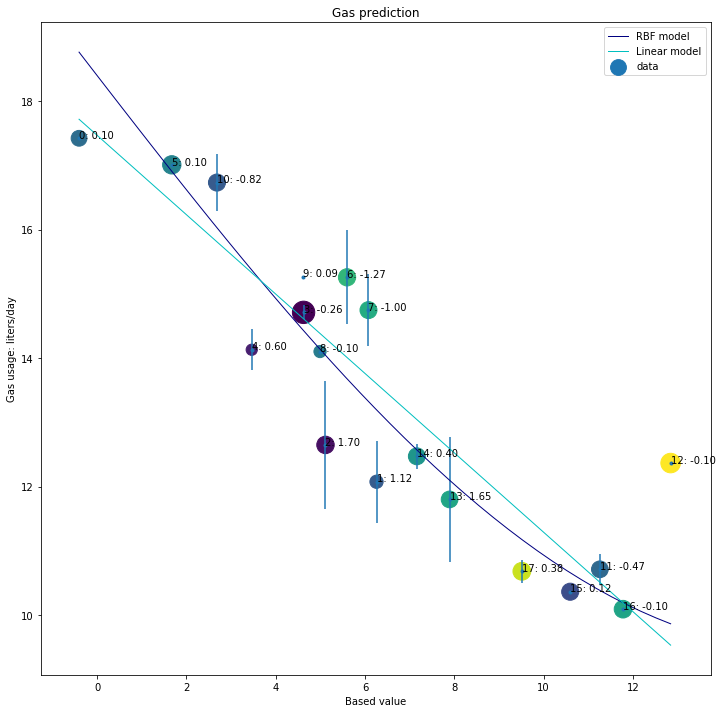

RBF = 1.31 (+/-1.26)
LIN = 1.32 (+/-1.30)


In [425]:
X = exttemp_X
sampling_X = np.vstack(np.linspace(np.amin(X), np.amax(X), num=41))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.001)
svr_lin = SVR(kernel='linear', C=1e3)
fit_rbf_1d = svr_rbf.fit(X, gas_Y, wieghts)
fit_lin_1d = svr_lin.fit(X, gas_Y, wieghts)

y_rbf = fit_rbf_1d.predict(sampling_X)
y_lin = fit_lin_1d.predict(sampling_X)
y_rbf_OnX = fit_rbf.predict(all_X)

barerror = cHelper.Normalize(np.absolute(y_rbf_OnX - gas_Y))*1.0
color = cHelper.Normalize(fl2temp_X)
annotation = y_rbf_OnX - gas_Y #np.array(fl2temp_X).reshape(len(fl2temp_X))
size = cHelper.Normalize(durations)*500.0

lw = 1
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.plot(sampling_X, y_rbf, color='navy', lw=lw, label='RBF model')
ax.plot(sampling_X, y_lin, color='c', lw=lw, label='Linear model')
ax.errorbar(X, gas_Y, yerr=barerror, fmt='.')
ax.scatter(X, gas_Y, c=color, s=size, label='data')
plt.title('Gas prediction')
plt.xlabel('Based value')
plt.ylabel('Gas usage: liters/day')
ax.legend()
#ax.rcParams["figure.figsize"] = [12, 12]

for i in range(len(annotation)):
    txt = "{}: {:.2f}".format(indexes[i], annotation[i])
    ax.annotate(txt, (X[i][0],gas_Y[i]), fontsize=10)

plt.show()

scores = cross_val_score(svr_rbf, X, gas_Y, scoring="neg_mean_squared_error", cv=10)
print("RBF = {:.2f} (+/-{:.2f})".format(-scores.mean(), scores.std()))
scores = cross_val_score(svr_lin, X, gas_Y, scoring="neg_mean_squared_error", cv=10)
print("LIN = {:.2f} (+/-{:.2f})".format(-scores.mean(), scores.std()))

In [361]:
y_rbf = svr_rbf.fit(X, gas_Y).predict(X)y_lin = svr_lin.fit(X, gas_Y).predict(X)
#y_poly = svr_poly.fit(X, gas_Y).predict(sampling_X)
log_indexes = [9, 10, 25, 33, 22, 27, 28]
for i in log_indexes: # 
    display([i, gas_Y[i], y_rbf[i], gas_Y[i] - y_rbf[i]])#, pipetemp_X[i], exttemp_X[i], fl2temp_X[i], time_keys[i], durations[i]])

[9, 5.574193548382026, 7.9690323931986402, -2.394838844816614]

[10, 1.7279999999893614, 1.8282652462658096, -0.10026524627644817]

[25, 6.281095353245055, 10.786664139468153, -4.5055687862230975]

[33, 12.366467977173201, 12.466619398157613, -0.1001514209844121]

[22, 19.741935483879413, 18.864070613058239, 0.87786487082117404]

[27, 18.835678670351868, 13.945764448187854, 4.8899142221640144]

[28, 20.164235294119432, 17.666904723869443, 2.4973305702499893]